## 03-10 데이터 시각화
 
이번 절에서는 pandas를 사용해서 데이터를 시각화 한다. pandas의 Series 또는 DataFrame의 plot() 메서드를 사용하여 쉽게 시각화 할 수 있다. plot()메서드는 내부에서 Matplotlib을 사용한다. 그래프의 의미와 상세한 그래프를 만드는 방법은 다음장(4장)에서 설명한다. 

### notebook에서 그래프 표시하기
이번 장에서는 notebook 상에 그래프를 출력하는 바업으로 pyplot.show() 함수를 사용한다. 

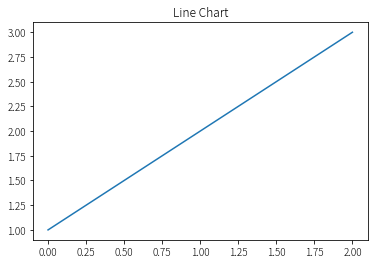

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib tk
# %matplotlib notebook
%matplotlib inline

ax = pd.Series([1, 2, 3]).plot()
ax.set_title('Line Chart')
# plt.style.use('ggplot')
plt.show()

그래프의 스타일을 변경하는 경우에는 pyplot.style.use()함수의 인수에 스타일명을 넘긴다. 

In [2]:
# plt.style.use('ggplot')


#### Series에서 플럿하기
Series에서 plot()메서드를 호출한 경우, 기본 설정으로 꺽은선 그래프가 출력된다. 

인덱스가 X값, 값(데이터)이 Y값이된다. 

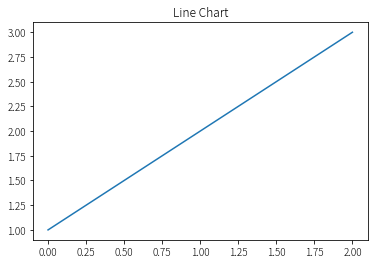

In [3]:
ser = pd.Series([1, 2, 3]) # 인덱스는 0, 1, 2, 값은 1, 2, 3
ax = ser.plot()
ax.set_title('Line Chart')
plt.show()

### DataFrame에서 플롯하기
DataFrame에서 plot()메서드를 호출한 경우 기본적으로 Series와 같은 동작을 하는데, 열수에 상응하는 요소가 그려진다. 인덱스가 X값, 이름 열의 값이 Y값이 된다. 

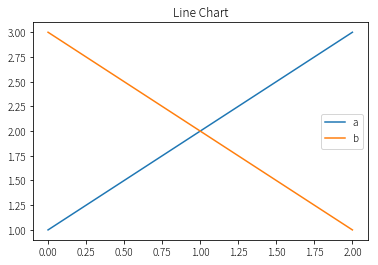

In [4]:
df = pd.DataFrame({'a': [1, 2, 3], 'b':[3, 2, 1]})
ax = df.plot()
ax.set_title('Line Chart')
plt.show()

### 꺽은선 그래프 작성하기
앞서 언급한 plot() 메서드를 사용한다. 

            TOEI ANIMATION   IG Port
Date                                
2015-01-01        1.000000  1.000000
2015-01-02        1.000000  1.000000
2015-01-05        1.011695  1.014082
2015-01-06        1.001463  1.000000
2015-01-07        0.982457  1.000824


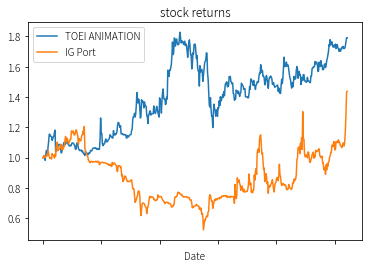

In [5]:
anime_stock_returns_csv = './anime/anime_stock_returns.csv'
anime_stock_returns_df = pd.read_csv(anime_stock_returns_csv, index_col=0)
print(anime_stock_returns_df.head())
ax = anime_stock_returns_df.plot()
ax.set_title('stock returns')
plt.show()

#### Y축 범위가 다른 경우
Y축 범위가 다른 경우에는 plot() 메서드 키워드인수 secondary_y에 두 번째 축이 되는 열 이름을 리스트 형으로지정한다. Y축의 레이블은 set_ylabel()메서드, right_ax_set_ylabel()메서드의 인수에 각각의 이름을 넘겨준다.

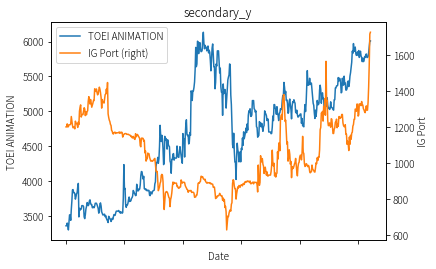

In [6]:
anime_stock_price_csv = './anime/anime_stock_price.csv'
anime_stock_price_df = pd.read_csv(anime_stock_price_csv, index_col=0)
ax = anime_stock_price_df.plot(secondary_y=['IG Port'])
ax.set_title('secondary_y')
ax.set_ylabel('TOEI ANIMATION')
ax.right_ax.set_ylabel('IG Port')
plt.show()

### 복수의 그림에 분할하는 방법
복수의 그래프에 분할하는 방법도 가능하다. plot()메서드의 키워드 인수 subplots에 True를 설정한다. 

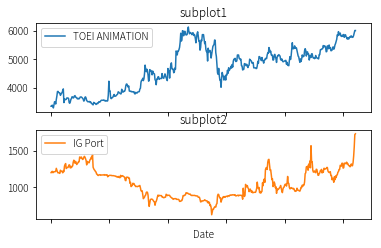

In [7]:
ax1, ax2 = anime_stock_price_df.plot(subplots=True)
ax1.set_title('subplot1')
ax2.set_title('subplot2')
plt.show()

#### 산포도 그래프 작성하기

plot.scatter() 메서드를 사용한다. 키워드 인수 x에 X값이 되는 열 이름, 키워드 인수 y에 Y값이 되는 열이름을 지정한다. 

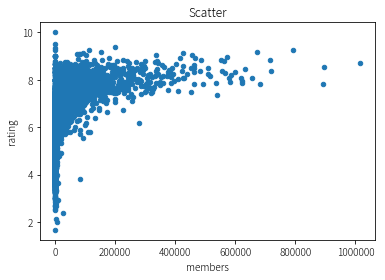

In [8]:
anime_master_csv = './anime/anime_master.csv'
anime_master_df = pd.read_csv(anime_master_csv)
ax = anime_master_df.plot.scatter(x='members', y='rating')
ax.set_title('Scatter')
plt.show()

### 막대그래프 작성하기
plot.bar() 메서드를 사용한다. 
✼ 그래프 좌측의 le7 은 10의 7승을 의미한다. 

In [9]:
%ls anime

3791.csv*                      anime_genre_top10_pivoted.csv*
4816.csv*                      anime_master.csv*
anime.csv*                     anime_split_genre.csv*
anime.db*                      anime_stock_price.csv*
anime.tsv*                     anime_stock_returns.csv*
anime.xlsx*                    n225.csv*
anime_genre_top10.csv*


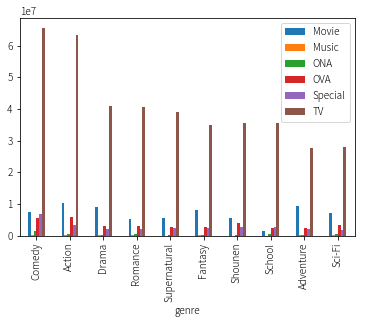

In [10]:
anime_genre_top10_pivoted_csv = './anime/anime_genre_top10_pivoted.csv'
anime_genre_top10_pivoted_df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col=0)
ax = anime_genre_top10_pivoted_df.plot.bar()
plt.show()

#### 로그축으로 변경하는 경우
plot.bar() 메서드의 키워드 인수 logy에 True를 설정하면 Y축이 로그가 된다. 
legend()메서드의 키워드인수 bbox_to_anchor를 설정하여 범례의 위치를 조정할 수 있다. 

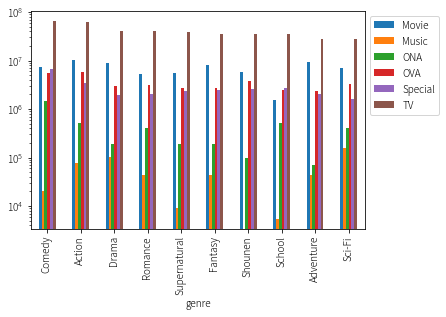

In [11]:
ax = anime_genre_top10_pivoted_df.plot.bar(logy=True)
ax.legend(bbox_to_anchor=(1,1))
plt.show()

#### 누적 막대그래프로 하는 경우
누적막대그래프는 plot.bar()메서드의 키워드 인수 stacked 에 True를 설정한다. 

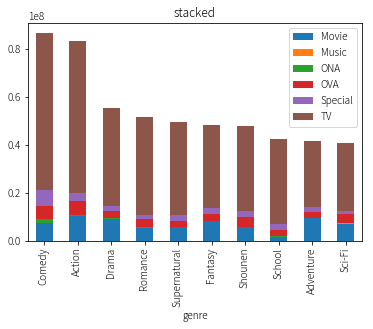

In [12]:
ax = anime_genre_top10_pivoted_df.plot.bar(stacked=True)
ax.set_title('stacked')
plt.show()

#### 히스토그램 작성하기
hist()메서드를 사용한다. 키워드 인수 bins에 정수값을 설정하여 막대 수를 변경할 수 있다. 

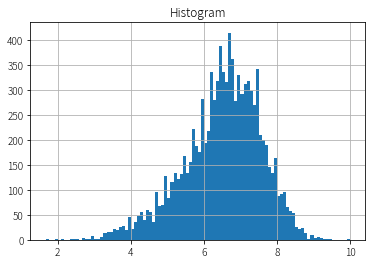

In [13]:
ax = anime_master_df['rating'].hist(bins=100)
ax.set_title('Histogram')
plt.show()

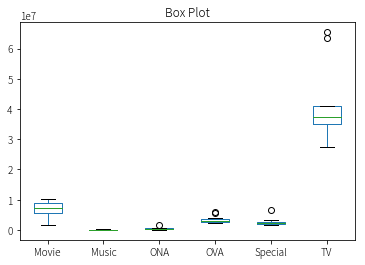

In [14]:
ax = anime_genre_top10_pivoted_df.plot.box()
ax.set_title('Box Plot')
plt.show()

### 원 그래프 작성하기
plot.pie() 메서드를 사용한다. 
기본 설정에서는 타원으로 그려지기 때문에 pie()메서드의 키워드 인수 figsize에 그림의 사이즈를 지정한다. 

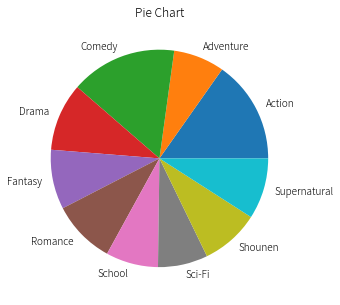

In [15]:
anime_genre_top10_csv = './anime/anime_genre_top10.csv'
anime_genre_top10_df = pd.read_csv(anime_genre_top10_csv)
ax = anime_genre_top10_df.groupby('genre').sum()['members'].plot.pie(figsize=(5, 5))
ax.set_title('Pie Chart')
ax.set_ylabel('') #Y 축 레이블 삭제
plt.show()